In [ ]:

!pip install scikit-multilearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.6 MB/s eta 0:00:00


# Import Library to this notebook

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, hamming_loss
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain, LabelPowerset
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [ ]:
import json
train = pd.read_json('/content/drive/MyDrive/Data/train_for_student.json')
test = pd.read_json('/content/drive/MyDrive/Data/test_for_student.json')

In [ ]:
print("train data's shape: ",train.shape)
print("test data's shape: ", test.shape)

train data's shape:  (3, 454)
test data's shape:  (2, 151)


## Checking Data

In [ ]:
train.head()

,1,2,3,4,5,6,7,8,9,10,...,445,446,447,448,449,450,451,452,453,454
Title,Activated carbon derived from bacterial cellul...,The algorithm of static hand gesture recogniti...,Alternative Redundant Residue Number System Co...,Comparative study of wax inhibitor performance...,Undrained lower bound solutions for end bearin...,Words Diffusion an Analysis of across Facebook...,Transformation of time Petri net into Promela,Annual Degradation Rate Analysis of Mono-Si Ph...,Development of Low-Cost in-the-Ear EEG Prototype,Model-based analysis of an integrated zinc-air...,...,Effect of rhenium and cobalt additions on the ...,Wheeling charge calculation with consideration...,Scaling laws for static displacement of linear...,Effect of TMB/P123 ratios on physicochemical p...,Synthetic CaO-based sorbent for high-temperatu...,A portable USB-controlled potentiostat for pap...,Literature reviews on applying artificial inte...,A multi-parameterized water quality prediction...,Semantic Segmentation on Medium-Resolution Sat...,Reducing the defects of a-pillar stamping part...
Abstract,© 2019 Elsevier B.V.Activated carbon derived f...,© Springer International Publishing AG 2018.Te...,© 2018 IEEE.Residue number system (RNS) is a n...,© Published under licence by IOP Publishing Lt...,"© 2019 John Wiley & Sons, Ltd.The undrained be...",© 2018 IEEE.Facebook Pages in Thailand have be...,© 2017 IEEE.This paper proposes a method of tr...,© 2013 IEEE.The annual degradation rate (DR) o...,© 2018 IEEE.This study focused on building a l...,"© 2019 Lao-atiman, Bumroongsil, Arpornwichanop...",...,© Carl Hanser Verlag GmbH & Co. KG.The effect ...,"© 2019 IEEE.In Thailand, Small Power Producers...",© 2018 Elsevier LtdExperimental studies on the...,© 2021 Elsevier LtdThe preparation of mesocell...,© 2018 Hydrogen Energy Publications LLCCalcium...,© 2018 IEEEThis paper presents a portable and ...,Copyright © 2019 for this paper by its authors...,© 2019 The authors and IOS Press. All rights r...,© 2018 IEEE.Semantic Segmentation is a fundame...,© 2019 IEEE.This research aims to reduce defec...
Classes,"[CHE, MATENG]",[CPE],[EE],"[PE, ME, CHE]","[CE, MATSCI]",[CPE],"[CPE, MATH]","[PE, EE, CHE]","[BME, CPE, IE]","[PE, METAL, EE, CPE, CHE, IE, MATH]",...,"[METAL, ME, CHE, MATH, MATSCI]","[ME, EE]","[CE, MATSCI]","[OPTIC, CHE, MATSCI]","[PE, CHE]","[CPE, CHE]","[CPE, EDU]","[ENV, EE, CHE]","[EE, CPE, OPTIC, EDU]","[METAL, EDU, MATSCI]"


In [ ]:
train_df = train.T
train_df.head()

,Title,Abstract,Classes
1,Activated carbon derived from bacterial cellul...,© 2019 Elsevier B.V.Activated carbon derived f...,"[CHE, MATENG]"
2,The algorithm of static hand gesture recogniti...,© Springer International Publishing AG 2018.Te...,[CPE]
3,Alternative Redundant Residue Number System Co...,© 2018 IEEE.Residue number system (RNS) is a n...,[EE]
4,Comparative study of wax inhibitor performance...,© Published under licence by IOP Publishing Lt...,"[PE, ME, CHE]"
5,Undrained lower bound solutions for end bearin...,"© 2019 John Wiley & Sons, Ltd.The undrained be...","[CE, MATSCI]"


In [ ]:
valid_classes = ["CE", "ENV", "BME", "PE", "METAL", "ME", "EE", "CPE", "OPTIC", "NANO", "CHE", "MATENG", "AGRI", "EDU", "IE", "SAFETY", "MATH", "MATSCI"]

for class_name in valid_classes:
    train_df[class_name] = train_df['Classes'].apply(lambda x: 1 if class_name in x else 0)
print(train_df)

                                                 Title  \
1    Activated carbon derived from bacterial cellul...   
2    The algorithm of static hand gesture recogniti...   
3    Alternative Redundant Residue Number System Co...   
4    Comparative study of wax inhibitor performance...   
5    Undrained lower bound solutions for end bearin...   
..                                                 ...   
450  A portable USB-controlled potentiostat for pap...   
451  Literature reviews on applying artificial inte...   
452  A multi-parameterized water quality prediction...   
453  Semantic Segmentation on Medium-Resolution Sat...   
454  Reducing the defects of a-pillar stamping part...   

                                              Abstract                Classes  \
1    © 2019 Elsevier B.V.Activated carbon derived f...          [CHE, MATENG]   
2    © Springer International Publishing AG 2018.Te...                  [CPE]   
3    © 2018 IEEE.Residue number system (RNS) is a n...      

In [ ]:
train_df.head()

,Title,Abstract,Classes,CE,ENV,BME,PE,METAL,ME,EE,...,OPTIC,NANO,CHE,MATENG,AGRI,EDU,IE,SAFETY,MATH,MATSCI
1,Activated carbon derived from bacterial cellul...,© 2019 Elsevier B.V.Activated carbon derived f...,"[CHE, MATENG]",0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,The algorithm of static hand gesture recogniti...,© Springer International Publishing AG 2018.Te...,[CPE],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alternative Redundant Residue Number System Co...,© 2018 IEEE.Residue number system (RNS) is a n...,[EE],0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Comparative study of wax inhibitor performance...,© Published under licence by IOP Publishing Lt...,"[PE, ME, CHE]",0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
5,Undrained lower bound solutions for end bearin...,"© 2019 John Wiley & Sons, Ltd.The undrained be...","[CE, MATSCI]",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
train_df.columns

Index(['Title', 'Abstract', 'Classes', 'CE', 'ENV', 'BME', 'PE', 'METAL', 'ME',
       'EE', 'CPE', 'OPTIC', 'NANO', 'CHE', 'MATENG', 'AGRI', 'EDU', 'IE',
       'SAFETY', 'MATH', 'MATSCI'],
      dtype='object')

In [ ]:
labels = np.array(['CE', 'ENV', 'BME', 'PE', 'METAL', 'ME',
       'EE', 'CPE', 'OPTIC', 'NANO', 'CHE', 'MATENG', 'AGRI', 'EDU', 'IE',
       'SAFETY', 'MATH', 'MATSCI'],dtype='str')

In [ ]:
print("Missing Values train's data:")
print(train_df.isnull().sum())

Missing Values train's data:
Title       0
Abstract    0
Classes     0
CE          0
ENV         0
BME         0
PE          0
METAL       0
ME          0
EE          0
CPE         0
OPTIC       0
NANO        0
CHE         0
MATENG      0
AGRI        0
EDU         0
IE          0
SAFETY      0
MATH        0
MATSCI      0
dtype: int64


In [ ]:
test_df = test.T
test_df


,Title,Abstract
001eval,Comparative Electrical Energy Yield Performanc...,© 2013 IEEE.Long-term energy evaluation of PV ...
002eval,Effects of graphene nanoplatelets on bio-based...,© The Author(s) 2021.Novel near-infrared (NIR)...
003eval,Anti-inflammatory action of two novel peptides...,© The Royal Society of Chemistry 2020.Peanut w...
004eval,Efficient all-and-one support vector machines ...,© 2018 IEEE.We introduce a new strategy to est...
005eval,Driver identification using histogram and neur...,© 2017 IEEE.Sensor technology has continuously...
...,...,...
147eval,Utilization of Sewage Sludge from Beverage Ind...,© Published under licence by IOP Publishing Lt...
148eval,Development of a Gateway for OpenADR-ECHONET L...,"© 2018 IEEE.In this paper, we develop an ECHON..."
149eval,Effect of solution treatment and precipitation...,© 2017 Elsevier Ltd. All rights reserved.The a...
150eval,An effect-analysis method for species-dependen...,"© The Authors, published by EDP Sciences, 2019..."


## Preprocess Data

In [ ]:
print("Missing Values test's Data: ")
print(test_df.isnull().sum())

Missing Values test's Data: 
Title       0
Abstract    0
dtype: int64


In [ ]:
train_df['Text']=train_df['Title']+' '+train_df['Abstract']
train_df.drop(columns=['Title','Abstract','Classes'], inplace=True)

train_df.head(10)

,CE,ENV,BME,PE,METAL,ME,EE,CPE,OPTIC,NANO,CHE,MATENG,AGRI,EDU,IE,SAFETY,MATH,MATSCI,Text
1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,Activated carbon derived from bacterial cellul...
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,The algorithm of static hand gesture recogniti...
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Alternative Redundant Residue Number System Co...
4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Comparative study of wax inhibitor performance...
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Undrained lower bound solutions for end bearin...
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Words Diffusion an Analysis of across Facebook...
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,Transformation of time Petri net into Promela ...
8,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,Annual Degradation Rate Analysis of Mono-Si Ph...
9,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,Development of Low-Cost in-the-Ear EEG Prototy...
10,0,0,0,1,1,0,1,1,0,0,1,0,0,0,1,0,1,0,Model-based analysis of an integrated zinc-air...


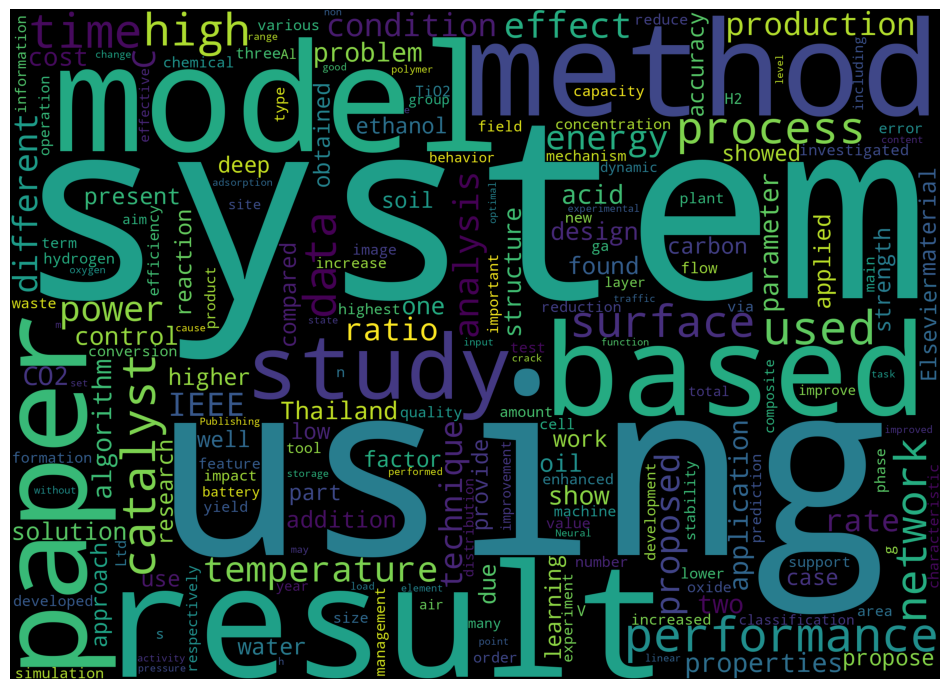

In [ ]:
plt.figure(figsize=(12,12))
#text = description_category.description.values
cloud = WordCloud(stopwords=STOPWORDS, background_color='black', collocations=False, width=2500, height=1800).generate(" ".join(train_df['Text']))
plt.axis('off')
plt.imshow(cloud)

In [ ]:
!pip install pyjanitor --quiet
import janitor
train_df = train_df.clean_names()
test_df = test_df.clean_names()
print("New Janitor Column Names TRAIN:\n", train_df.columns)
print("\nNew Janitor Column Names TEST:\n", test_df.columns)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.8/171.8 kB 3.6 MB/s eta 0:00:00
New Janitor Column Names TRAIN:
 Index(['ce', 'env', 'bme', 'pe', 'metal', 'me', 'ee', 'cpe', 'optic', 'nano',
       'che', 'mateng', 'agri', 'edu', 'ie', 'safety', 'math', 'matsci',
       'text'],
      dtype='object')

New Janitor Column Names TEST:
 Index(['title', 'abstract'], dtype='object')


In [ ]:
train_df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['ce', 'env', 'bme', 'pe', 'metal', 'me', 'ee', 'cpe', 'optic', 'nano',
       'che', 'mateng', 'agri', 'edu', 'ie', 'safety', 'math', 'matsci',
       'text'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


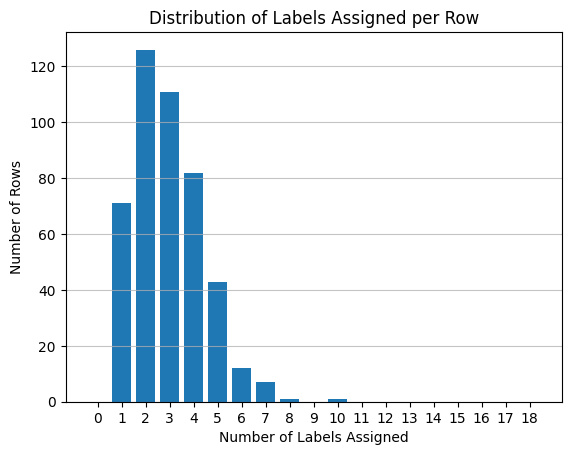

In [ ]:
categories= ['ce', 'env', 'bme', 'pe', 'metal', 'me', 'ee', 'cpe', 'optic', 'nano',
       'che', 'mateng', 'agri', 'edu', 'ie', 'safety', 'math', 'matsci']

# Calculate the number of labels assigned to each row
num_labels_assigned = train_df[categories].sum(axis=1)

# Create a histogram
plt.hist(num_labels_assigned, bins=range(0, len(categories) + 2), align='left', rwidth=0.8)
plt.xlabel('Number of Labels Assigned')
plt.ylabel('Number of Rows')
plt.title('Distribution of Labels Assigned per Row')
plt.xticks(range(len(categories) + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


# Define a function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove symbols and punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenization (split text into words)
    words = text.split()

    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(words)

    # Remove stopwords (requires NLTK library)
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Join the words back into text
    text = ' '.join(words)

    text = text.lower()
    # Change 't to 'not'
    text = re.sub(r"\'t", " not", text)
    # Remove @name
    text = re.sub(r'(@.*?)[\s]', ' ', text)
    # Isolate and remove punctuations except '?'
    text = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', text)
    text = re.sub(r'[^\w\s\?]', ' ', text)
    # Remove some special characters
    text = re.sub(r'([\;\:\|•«\n])', ' ', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()


    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import nltk
nltk.download('stopwords')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

import nltk
import string
nltk.download('wordnet')
train_df['text'] = train_df['text'].apply(lambda x: preprocess_text(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train_df['text'][2]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'algorithm static hand gesture recognition using rulebased classification springer international publishing ag 2018technology becomes part human life decade especially human computer interaction hci considered important research area involving assistive technology medical system hand gesture classified intuitive method human interact computer useful elderly people cannot express feeling word paper proposed hand gesture recognition technique elderly using contour detection convex hull feature extraction rulebased classification visionbased hand gesture recognition considered classifying six hand gesture lingual description experimental result hand gesture system provides good detection classification result six static hand gesture'

In [ ]:
train_df[categories].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ce,env,bme,pe,metal,me,ee,cpe,optic,nano,che,mateng,agri,edu,ie,safety,math,matsci
1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Train/Test Split

In [ ]:
X = train_df['text']
y = train_df[categories]

# Split the train data into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42,shuffle=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(363,)
(91,)
(363, 18)
(91, 18)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000,stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Model traning

## Logistic regression

In [ ]:
# Initialize and train the MultiOutputClassifier with Logistic Regression as the base estimator
lr_model = MultiOutputClassifier(LogisticRegression())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Fit the model to the training data
lr_model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MultiOutputClassifier(estimator=LogisticRegression())

In [ ]:
# Predictions on the validation set
y_pred = lr_model.predict(X_val_tfidf)

# Evaluate the model using appropriate multi-label classification metrics
accuracy = accuracy_score(y_val, y_pred)
hamming_loss_value = hamming_loss(y_val, y_pred)
f1_micro = f1_score(y_val, y_pred, average='micro')  # Micro-averaged F1-score

print(f"Accuracy: {accuracy:.2f}%")
print(f"Hamming Loss: {hamming_loss_value:.2f}")
print(f"F1 Micro: {f1_micro:.2f}")

Accuracy: 0.01%
Hamming Loss: 0.15
F1 Micro: 0.21


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Multinomial

In [ ]:
nb_model = MultiOutputClassifier(MultinomialNB())
nb_model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MultiOutputClassifier(estimator=MultinomialNB())

In [ ]:
# Predictions on the validation set
y_pred = nb_model.predict(X_val_tfidf)

# Evaluate the model using appropriate multi-label classification metrics
accuracy = accuracy_score(y_val, y_pred)
hamming_loss_value = hamming_loss(y_val, y_pred)
f1_micro = f1_score(y_val, y_pred, average='micro')  # Micro-averaged F1-score

print(f"Accuracy: {accuracy:.2f}%")
print(f"Hamming Loss: {hamming_loss_value:.2f}")
print(f"F1 Micro: {f1_micro:.2f}")

Accuracy: 0.01%
Hamming Loss: 0.15
F1 Micro: 0.21


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Ramdom Forest Classifier

In [ ]:
rf_model = MultiOutputClassifier(RandomForestClassifier())
rf_model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MultiOutputClassifier(estimator=RandomForestClassifier())

In [ ]:
# Predictions on the validation set
y_pred = rf_model.predict(X_val_tfidf)

# Evaluate the model using appropriate multi-label classification metrics
accuracy = accuracy_score(y_val, y_pred)
hamming_loss_value = hamming_loss(y_val, y_pred)
f1_micro = f1_score(y_val, y_pred, average='micro')  # Micro-averaged F1-score

print(f"Accuracy: {accuracy:.2f}%")
print(f"Hamming Loss: {hamming_loss_value:.2f}")
print(f"F1 Micro: {f1_micro:.2f}")

Accuracy: 0.04%
Hamming Loss: 0.14
F1 Micro: 0.33


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## XGB Classifier

In [ ]:
xgb_model = MultiOutputClassifier(XGBClassifier())
xgb_model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

In [ ]:
# Predictions on the validation set
y_pred = xgb_model.predict(X_val_tfidf)

# Evaluate the model using appropriate multi-label classification metrics
accuracy = accuracy_score(y_val, y_pred)
hamming_loss_value = hamming_loss(y_val, y_pred)
f1_micro = f1_score(y_val, y_pred, average='micro')  # Micro-averaged F1-score

print(f"Accuracy: {accuracy:.2f}%")
print(f"Hamming Loss: {hamming_loss_value:.2f}")
print(f"F1 Micro: {f1_micro:.2f}")

Accuracy: 0.07%
Hamming Loss: 0.14
F1 Micro: 0.44


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert target labels to NumPy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from keras.optimizers import Nadam

# Define the MLP model
model = Sequential()
model.add(Dense(512, input_shape=(X_train_tfidf.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

# Compile the model with Nadam optimizer
model.compile(optimizer=Nadam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-6, patience=6, verbose=1, mode='auto', restore_best_weights=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import tensorflow as tf
import numpy as np

# Assuming X_train_tfidf and X_val_tfidf are your sparse matrices (e.g., scipy sparse matrices)
# Convert them to SparseTensor
X_train_indices = np.column_stack(X_train_tfidf.nonzero())
X_train_values = X_train_tfidf.data
X_train_dense_shape = X_train_tfidf.shape

X_val_indices = np.column_stack(X_val_tfidf.nonzero())
X_val_values = X_val_tfidf.data
X_val_dense_shape = X_val_tfidf.shape

X_train_tfidf = tf.sparse.SparseTensor(indices=X_train_indices, values=X_train_values, dense_shape=X_train_dense_shape)
X_val_tfidf = tf.sparse.SparseTensor(indices=X_val_indices, values=X_val_values, dense_shape=X_val_dense_shape)

# Reorder the indices of X_train_tfidf
X_train_tfidf = tf.sparse.reorder(X_train_tfidf)

# Reorder the indices of X_val_tfidf
X_val_tfidf = tf.sparse.reorder(X_val_tfidf)

# Train the model
history = model.fit(X_train_tfidf, y_train, callbacks=[monitor], epochs=30, batch_size=64, validation_data=(X_val_tfidf, y_val))


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6/6 [==============================] - 2s 58ms/step - loss: 0.6812 - accuracy: 0.0992 - val_loss: 0.6517 - val_accuracy: 0.1099
Epoch 2/30
6/6 [==============================] - 0s 31ms/step - loss: 0.6036 - accuracy: 0.1129 - val_loss: 0.5015 - val_accuracy: 0.1209
Epoch 3/30
6/6 [==============================] - 0s 34ms/step - loss: 0.4562 - accuracy: 0.1074 - val_loss: 0.4194 - val_accuracy: 0.0549
Epoch 4/30
6/6 [==============================] - 0s 32ms/step - loss: 0.4092 - accuracy: 0.1102 - val_loss: 0.4159 - val_accuracy: 0.0549
Epoch 5/30
6/6 [==============================] - 0s 32ms/step - loss: 0.3921 - accuracy: 0.1295 - val_loss: 0.4056 - val_accuracy: 0.1429
Epoch 6/30
6/6 [==============================] - 0s 31ms/step - loss: 0.3759 - accuracy: 0.1680 - val_loss: 0.3952 - val_accuracy: 0.1319
Epoch 7/30
6/6 [==============================] - 0s 36ms/step - loss: 0.3550 - accuracy: 0.1873 - val_loss: 0.3825 - val_accuracy: 0.1429
Epoch 8/30
6/6 [======================

In [ ]:
# Predictions on the validation set
y_pred = model.predict(X_val_tfidf)

# Convert predicted probabilities to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model using appropriate multi-label classification metrics
accuracy = accuracy_score(y_val, y_pred_binary)
hamming_loss_value = hamming_loss(y_val, y_pred_binary)
f1_micro = f1_score(y_val, y_pred_binary, average='micro')  # Micro-averaged F1-score

print(f"Accuracy: {accuracy:.2f}")
print(f"Hamming Loss: {hamming_loss_value:.2f}")
print(f"F1 Micro: {f1_micro:.2f}")

3/3 [==============================] - 0s 4ms/step
Accuracy: 0.13
Hamming Loss: 0.12
F1 Micro: 0.48


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Make Test data before test predicted

In [ ]:
test_df2 = test.T
test_df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,Abstract
001eval,Comparative Electrical Energy Yield Performanc...,© 2013 IEEE.Long-term energy evaluation of PV ...
002eval,Effects of graphene nanoplatelets on bio-based...,© The Author(s) 2021.Novel near-infrared (NIR)...
003eval,Anti-inflammatory action of two novel peptides...,© The Royal Society of Chemistry 2020.Peanut w...
004eval,Efficient all-and-one support vector machines ...,© 2018 IEEE.We introduce a new strategy to est...
005eval,Driver identification using histogram and neur...,© 2017 IEEE.Sensor technology has continuously...
...,...,...
147eval,Utilization of Sewage Sludge from Beverage Ind...,© Published under licence by IOP Publishing Lt...
148eval,Development of a Gateway for OpenADR-ECHONET L...,"© 2018 IEEE.In this paper, we develop an ECHON..."
149eval,Effect of solution treatment and precipitation...,© 2017 Elsevier Ltd. All rights reserved.The a...
150eval,An effect-analysis method for species-dependen...,"© The Authors, published by EDP Sciences, 2019..."


In [ ]:
test_df2['text']=test_df2['Title']+' '+test_df2['Abstract']
test_df2.drop(columns=['Title','Abstract'], inplace=True)
test_df2.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text
001eval,Comparative Electrical Energy Yield Performanc...
002eval,Effects of graphene nanoplatelets on bio-based...
003eval,Anti-inflammatory action of two novel peptides...
004eval,Efficient all-and-one support vector machines ...
005eval,Driver identification using histogram and neur...
006eval,Drift-Flux Correlation of Oil-Water Flow in Ho...
007eval,Training Performance Measurement with Schema a...
008eval,Comparative Analysis of Successive Cancellatio...
009eval,Development of a prototype of autonomous vehic...
010eval,Characteristics of graphite felt electrodes tr...


In [ ]:
import string

test_df2['text'] = test_df2['text'].apply(lambda x: preprocess_text(x))
test_df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text
001eval,comparative electrical energy yield performanc...
002eval,effect graphene nanoplatelets biobased shape m...
003eval,antiinflammatory action two novel peptide deri...
004eval,efficient allandone support vector machine bas...
005eval,driver identification using histogram neural n...
...,...
147eval,utilization sewage sludge beverage industry dy...
148eval,development gateway openadrechonet lite protoc...
149eval,effect solution treatment precipitation aging ...
150eval,effectanalysis method speciesdependent coral h...


In [ ]:
test_df2 = test_df2['text']
X_test_tfidf = tfidf_vectorizer.transform(test_df2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Predict test

In [ ]:
import string
import tensorflow as tf
from scipy.sparse import csr_matrix

# Convert the TF-IDF matrix to a CSR (Compressed Sparse Row) matrix
X_test_tfidf_csr = csr_matrix(X_test_tfidf)

# Create a TensorFlow SparseTensor directly from the CSR matrix
X_test_tfidf_sparse = tf.SparseTensor(
    indices=np.column_stack(X_test_tfidf_csr.nonzero()),
    values=X_test_tfidf_csr.data,
    dense_shape=X_test_tfidf_csr.shape
)

# Reorder the indices of the SparseTensor
X_test_tfidf_reordered = tf.sparse.reorder(X_test_tfidf_sparse)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Make predictions using the final model with the reordered SparseTensor
final_predictions = model.predict(X_test_tfidf_reordered)

1/5 [=====>........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5/5 [==============================] - 0s 3ms/step


In [ ]:
categories

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['ce',
 'env',
 'bme',
 'pe',
 'metal',
 'me',
 'ee',
 'cpe',
 'optic',
 'nano',
 'che',
 'mateng',
 'agri',
 'edu',
 'ie',
 'safety',
 'math',
 'matsci']

In [ ]:
predictions = (final_predictions > 0.5).astype(int)
predictions[:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
predictions_df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ce,env,bme,pe,metal,me,ee,cpe,optic,nano,che,mateng,agri,edu,ie,safety,math,matsci
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Calculate the number of labels assigned to each row
num_labels_assigned = predictions_df[categories].sum(axis=1)

# Filter rows with more than one label
rows_with_multiple_labels = predictions_df[num_labels_assigned > 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rows_with_multiple_labels.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(49, 18)

In [ ]:
rows_with_multiple_labels

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ce,env,bme,pe,metal,me,ee,cpe,optic,nano,che,mateng,agri,edu,ie,safety,math,matsci
1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
16,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
18,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
21,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
27,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
39,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


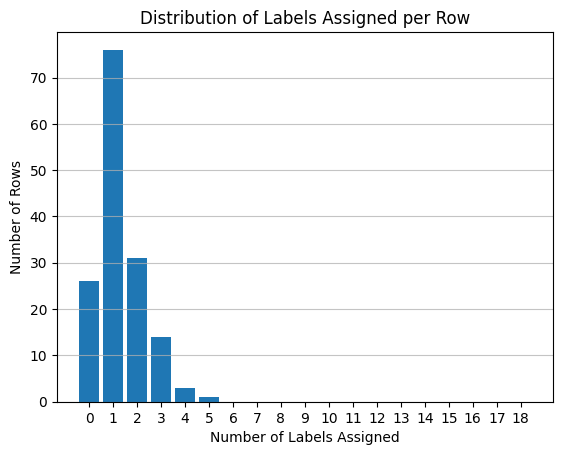

In [ ]:
# Calculate the number of labels assigned to each row
num_labels_assigned = predictions_df[categories].sum(axis=1)

# Create a histogram
plt.hist(num_labels_assigned, bins=range(0, len(categories) + 2), align='left', rwidth=0.8)
plt.xlabel('Number of Labels Assigned')
plt.ylabel('Number of Rows')
plt.title('Distribution of Labels Assigned per Row')
plt.xticks(range(len(categories) + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

## Export CSV


In [ ]:
predictions_df = rows_with_multiple_labels
predictions_df.to_csv('out3.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
